# **Dataset**



Dataset ini mengandung informasi mengenai berbagai atribut rumah yang dijual di wilayah Bandung. Beberapa atribut yang terdapat dalam dataset antara lain:




1.   Price: Harga rumah yang dijual, yang biasanya ditampilkan dalam format rupiah dan dapat mencakup informasi tambahan seperti cicilan bulanan.
1.   Location: Lokasi atau alamat rumah yang dijual, termasuk nama kawasan atau daerah di Bandung
2.   Bedroom: Jumlah kamar tidur yang tersedia di rumah tersebut.

1.   Bathroom: Jumlah kamar mandi yang tersedia di rumah tersebut.
2.   Carport: Informasi tentang apakah rumah dilengkapi dengan tempat parkir mobil (carport).

1.   Land: Ukuran tanah dalam satuan meter persegi.
2.   
Building: Ukuran bangunan dalam satuan meter persegi.
1.   City/Regency = kawasan wilayah bandung


















##A. **DATA UNDERSTANDING**

###1.**LOADING DATA**


a. IMPORT LIBRARY


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro,skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv("dataset_rumah_bandung.csv")
df


,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency
0,0,1.600000e+09,Padalarang,2,1,1,72,50,8,West Bandung Regency
1,1,8.500000e+08,Parongpong,2,1,1,70,80,8,West Bandung Regency
2,2,8.750000e+08,Buah Batu,3,2,1,60,70,8,Bandung City
3,3,1.750000e+09,Bojongsoang,2,3,1,90,94,8,Bandung Regency
4,4,4.900000e+09,Bojongloa Kidul,4,4,0,200,300,8,Bandung City
...,...,...,...,...,...,...,...,...,...,...
32531,53461,4.750000e+08,Rancasari,2,1,1,60,65,10,Bandung City
32532,53462,7.000000e+09,Bojongloa Kidul,5,5,2,426,500,10,Bandung City
32533,53463,5.500000e+09,Sukasari,5,3,2,427,283,10,Bandung City
32534,53464,3.950000e+09,Regol,4,3,2,182,380,10,Bandung City


###2. **KARAKTERISTIK DATA**

In [3]:
print("Informasi dataset:")
df.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32536 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32536 non-null  int64  
 5   Carport       32536 non-null  int64  
 6   Land          32536 non-null  int64  
 7   Building      32536 non-null  int64  
 8   Month         32536 non-null  int64  
 9   City/Regency  32536 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 2.5+ MB


In [4]:
print("\nStatistik deskriptif:")
df.describe()


Statistik deskriptif:


,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,25966.194308,2.554932e+09,3.524158,2.527631,1.052096,181.410929,179.400357,8.988259
std,15468.621566,1.879994e+09,1.235943,1.074212,0.796888,107.507440,108.512362,0.821067
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000


In [5]:
df.shape

(32536, 10)

###3. **Missing Values & Duplication**

In [6]:
print("\nMissing values:")
print(df.isnull().sum())

num_duplicates = df.duplicated().sum()
print(f"\nJumlah total duplikasi: {num_duplicates}")


Missing values:
Unnamed: 0      0
Price           0
Location        0
Bedroom         0
Bathroom        0
Carport         0
Land            0
Building        0
Month           0
City/Regency    0
dtype: int64

Jumlah total duplikasi: 0


###4. **Distribusi Data**

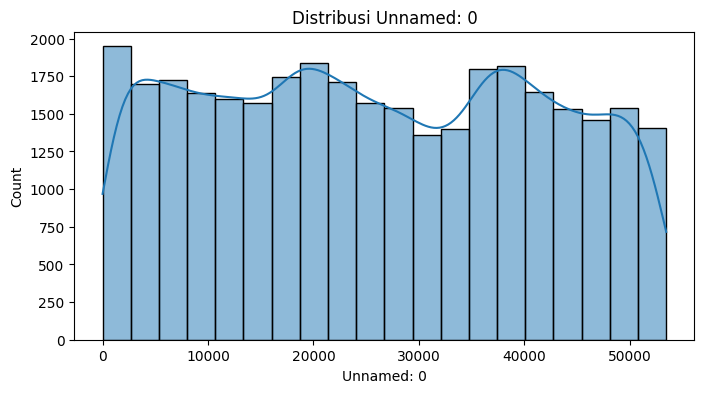

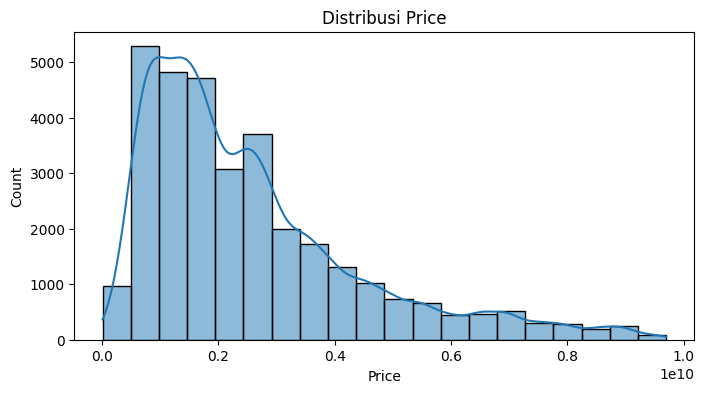

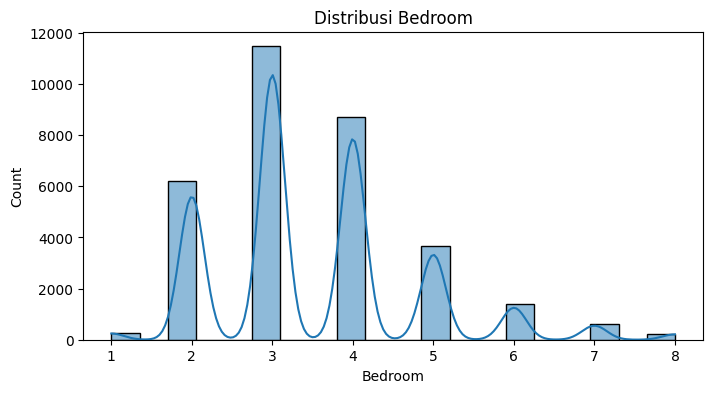

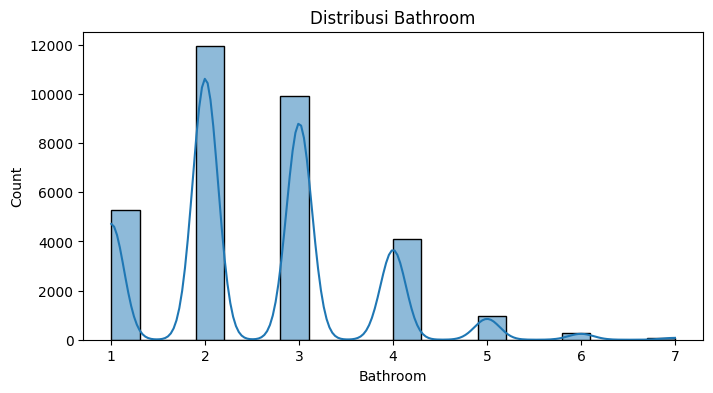

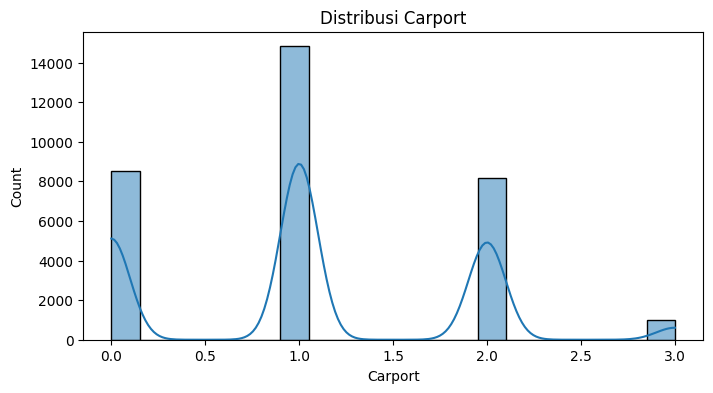

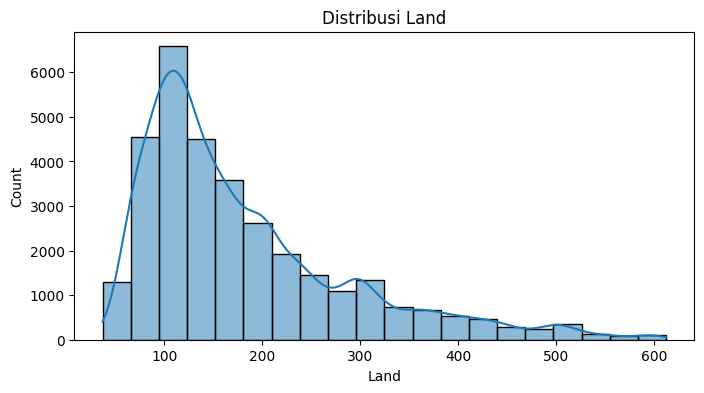

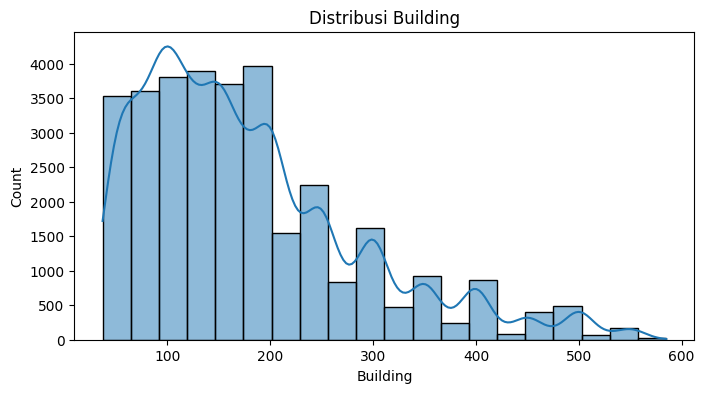

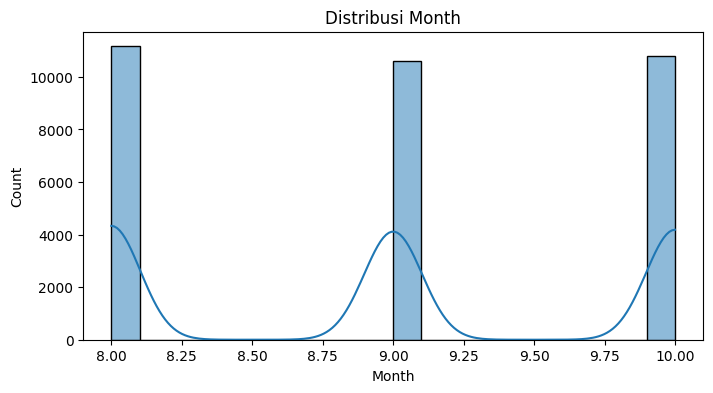

In [7]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

###5. **Deteksi Outlier**


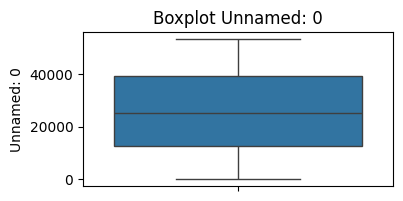

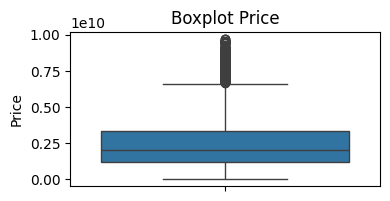

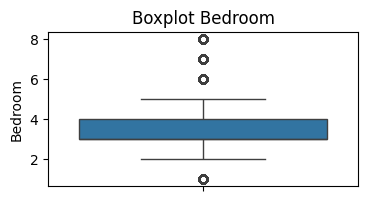

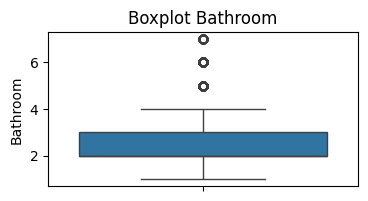

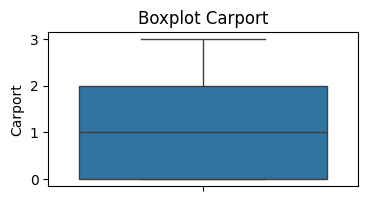

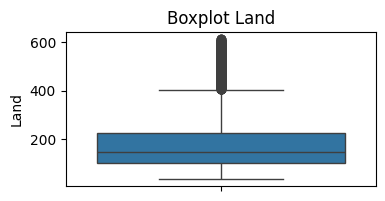

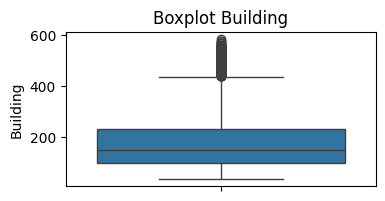

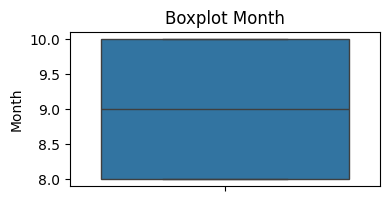

In [8]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot {column}')
    plt.show()

###6. **Analisis Korelasi**

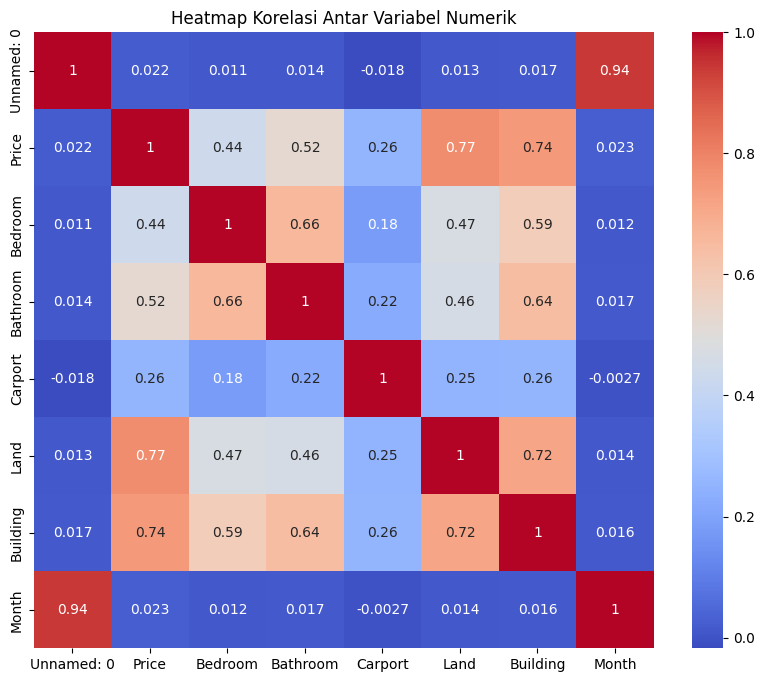

In [9]:
# Pilih hanya kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasi antar variabel numerik
correlation = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

###7. **Analisis Data Kategorikal**

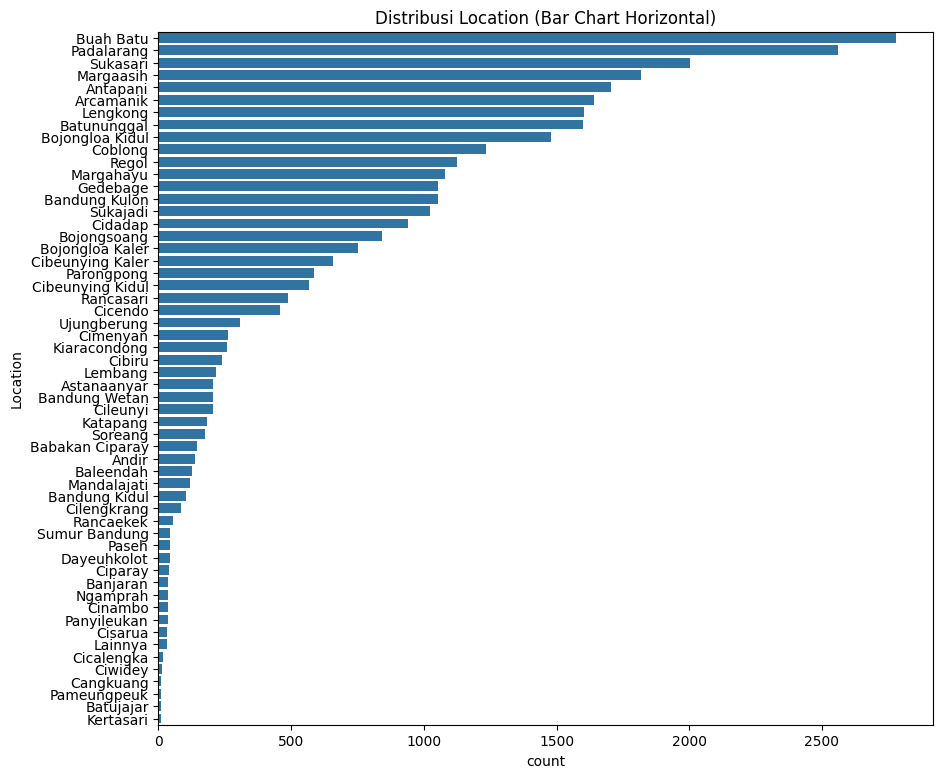

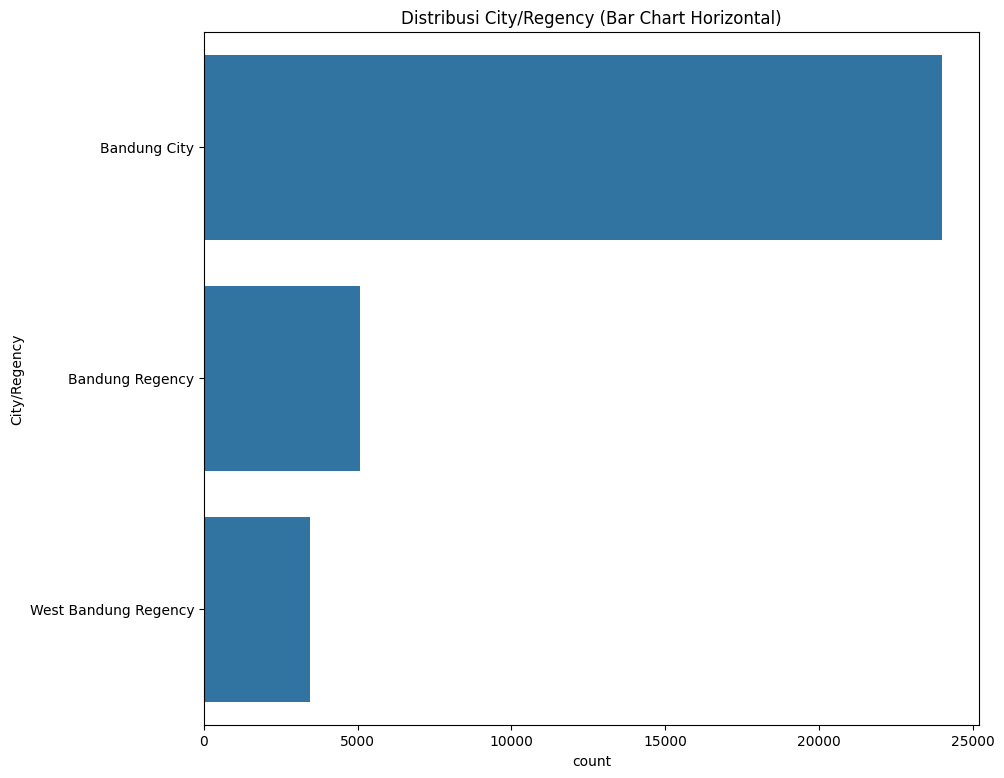

In [10]:
selected_columns = df.select_dtypes(include=['object']).columns[:10]

for column in selected_columns:
    # Hitung frekuensi kategori
    value_counts = df[column].value_counts()
    low_freq_categories = value_counts[value_counts < 10].index

    # Gabungkan kategori dengan frekuensi rendah menjadi 'Lainnya'
    df[column] = df[column].replace(low_freq_categories, 'Lainnya')

    # Plot bar chart horizontal
    plt.figure(figsize=(10, 9))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index)
    plt.title(f'Distribusi {column} (Bar Chart Horizontal)')
    plt.show()

##B **DATA PREPARATION**

###1. **Data Cleaning**

####1.1 **Menghapus Kolom Yang Tidak Dipakai**

Kolom Month dihapus karena tidak relevan untuk analisis harga rumah. Kolom Location dihapus karena terlalu banyak kategori dan dapat memperbesar dimensi dataset, sementara informasinya sudah cukup diwakili oleh City/Regency. Kolom Unnamed: 0 dihapus karena hanya berfungsi sebagai indeks dan tidak memberikan informasi penting.

In [11]:
# Menampilkan kolom sebelum penghapusan
print("Kolom sebelum penghapusan:", df.columns.tolist())

# Menghapus kolom 'Unnamed: 0', 'Month' dan 'Location'
df.drop(columns=['Unnamed: 0','Month', 'Location'], inplace=True)

# Menampilkan kolom setelah penghapusan
print("Kolom setelah penghapusan:", df.columns.tolist())

Kolom sebelum penghapusan: ['Unnamed: 0', 'Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Month', 'City/Regency']
Kolom setelah penghapusan: ['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'City/Regency']


####1.2 **Menghapus Duplikasi**

In [12]:
# Mengecek jumlah total data dan duplikasi sebelum penghapusan
total_data_before = df.shape[0]
num_duplicates_before = df.duplicated().sum()
print(f"Jumlah total data sebelum menghapus duplikasi: {total_data_before}")
print(f"Jumlah duplikasi data sebelum dihapus  : {num_duplicates_before}")

Jumlah total data sebelum menghapus duplikasi: 32536
Jumlah duplikasi data sebelum dihapus  : 7768


In [13]:
# Menghapus duplikasi
df.drop_duplicates(inplace=True)

# Mengecek jumlah total data dan duplikasi setelah penghapusan
total_data_after = df.shape[0]
num_duplicates_after = df.duplicated().sum()
print(f"Jumlah total data setelah menghapus duplikasi: {total_data_after}")
print(f"Jumlah duplikasi data setelah dihapus: {num_duplicates_after}")

df

Jumlah total data setelah menghapus duplikasi: 24768
Jumlah duplikasi data setelah dihapus: 0


,Price,Bedroom,Bathroom,Carport,Land,Building,City/Regency
0,1.600000e+09,2,1,1,72,50,West Bandung Regency
1,8.500000e+08,2,1,1,70,80,West Bandung Regency
2,8.750000e+08,3,2,1,60,70,Bandung City
3,1.750000e+09,2,3,1,90,94,Bandung Regency
4,4.900000e+09,4,4,0,200,300,Bandung City
...,...,...,...,...,...,...,...
32527,5.200000e+09,5,4,3,400,300,Bandung City
32530,1.900000e+09,3,2,1,126,63,West Bandung Regency
32531,4.750000e+08,2,1,1,60,65,Bandung City
32533,5.500000e+09,5,3,2,427,283,Bandung City


####1.3 **Menangani Missing Values**

In [14]:
# Mengecek missing values sebelum penanganan
print("\nMissing values sebelum penanganan:")
print(df.isnull().sum())


Missing values sebelum penanganan:
Price           0
Bedroom         0
Bathroom        0
Carport         0
Land            0
Building        0
City/Regency    0
dtype: int64


####1.4 **Menangani Outlier**

In [15]:
# Memilih kolom numerik saja
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Menghitung IQR untuk mengidentifikasi outlier
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyimpan jumlah data sebelum penghapusan outlier
data_before = df.shape[0]

# Menghapus outlier dari dataset
for column in numerical_columns.columns:
    # Hanya melakukan filtering untuk kolom yang ada di lower_bound dan upper_bound
    if column in lower_bound.index:
        df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

# Menyimpan jumlah data setelah penghapusan outlier
data_after = df.shape[0]

# Menampilkan informasi jumlah data
print(f"Jumlah data sebelum outlier dihapus : {data_before}")
print(f"Jumlah data setelah menghapus outlier: {data_after}")

Jumlah data sebelum outlier dihapus : 24768
Jumlah data setelah menghapus outlier: 20412


In [16]:
print("Informasi DataFrame:")
df.info()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 20412 entries, 0 to 32535
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         20412 non-null  float64
 1   Bedroom       20412 non-null  int64  
 2   Bathroom      20412 non-null  int64  
 3   Carport       20412 non-null  int64  
 4   Land          20412 non-null  int64  
 5   Building      20412 non-null  int64  
 6   City/Regency  20412 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ MB


###2 **Data Transformation**

####2..1 **Data Encoding**

In [17]:

# Membuat mapping manual
mapping = {
    'West Bandung Regency': 1,
    'Bandung Regency': 2,
    'Bandung City': 3,
    # Tambahkan kota/regensi lain yang ada di dataset jika perlu
}

# Mengganti nilai dalam kolom 'City/Regency' sesuai dengan mapping
df['City/Regency'] = df['City/Regency'].map(mapping)

# Menampilkan DataFrame setelah Mapping
print("DataFrame setelah Mapping:")
print(df)


DataFrame setelah Mapping:
              Price  Bedroom  Bathroom  Carport  Land  Building  City/Regency
0      1.600000e+09        2         1        1    72        50             1
1      8.500000e+08        2         1        1    70        80             1
2      8.750000e+08        3         2        1    60        70             3
3      1.750000e+09        2         3        1    90        94             2
4      4.900000e+09        4         4        0   200       300             3
...             ...      ...       ...      ...   ...       ...           ...
32525  1.200000e+09        4         2        1   120       220             3
32527  5.200000e+09        5         4        3   400       300             3
32530  1.900000e+09        3         2        1   126        63             1
32531  4.750000e+08        2         1        1    60        65             3
32535  1.350000e+09        3         2        1   101       111             3

[20412 rows x 7 columns]


####2..2 **Data Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

# Memilih fitur numerik
features = ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'City/Regency']
X = df[features]  # Fitur independen

# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan contoh data setelah standarisasi
print("Data setelah Scaling:")
print(pd.DataFrame(X_scaled, columns=features).head())


Data setelah Scaling:
    Bedroom  Bathroom   Carport      Land  Building  City/Regency
0 -1.350463 -1.468839  0.034108 -1.102006 -1.273982     -2.423466
1 -1.350463 -1.468839  0.034108 -1.129606 -0.894663     -2.423466
2 -0.258581 -0.331910  0.034108 -1.267604 -1.021103      0.585707
3 -1.350463  0.805018  0.034108 -0.853610 -0.717648     -0.918880
4  0.833301  1.941946 -1.284460  0.664370  1.887009      0.585707


##C **DATA MODELING**

###1 **K-Means Clustering**

####1.1 **Aplikasi K-Means Clustering**

In [19]:
from sklearn.cluster import KMeans

# jumlah cluster
n_clusters = 3  #3 untuk Rumah Ekonomis, Standar, dan Mewah

# Aplikasikan K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Price_Category'] = kmeans.fit_predict(X_scaled)

# Menampilkan hasil kategori cluster
df['Price_Category'] = df['Price_Category'].map({0: 'Rumah Ekonomis', 1: 'Rumah Standar', 2: 'Rumah Mewah'})
print("Data dengan Label Harga Properti:")
print(df.head())


Data dengan Label Harga Properti:
          Price  Bedroom  Bathroom  Carport  Land  Building  City/Regency  \
0  1.600000e+09        2         1        1    72        50             1   
1  8.500000e+08        2         1        1    70        80             1   
2  8.750000e+08        3         2        1    60        70             3   
3  1.750000e+09        2         3        1    90        94             2   
4  4.900000e+09        4         4        0   200       300             3   

   Price_Category  
0     Rumah Mewah  
1     Rumah Mewah  
2  Rumah Ekonomis  
3     Rumah Mewah  
4   Rumah Standar  


###2 **Feature Engineering**

####2.1 **Feature Engineering**

In [20]:
# Kolom 'Price_Category' sudah ditambahkan pada langkah K-Means
# Cek hasil DataFrame dengan kategori harga
print("Data dengan Kategori Harga:")
print(df[['Price', 'Bedroom', 'Bathroom', 'Land', 'Building', 'City/Regency', 'Price_Category']].head())


Data dengan Kategori Harga:
          Price  Bedroom  Bathroom  Land  Building  City/Regency  \
0  1.600000e+09        2         1    72        50             1   
1  8.500000e+08        2         1    70        80             1   
2  8.750000e+08        3         2    60        70             3   
3  1.750000e+09        2         3    90        94             2   
4  4.900000e+09        4         4   200       300             3   

   Price_Category  
0     Rumah Mewah  
1     Rumah Mewah  
2  Rumah Ekonomis  
3     Rumah Mewah  
4   Rumah Standar  


####2.2 **Menyiapkan Data untuk Model**

In [21]:
# Pisahkan fitur (X) dan target (y)
X = df[features]  # Fitur
y = df['Price_Category']  # Target

# Standarisasi data lagi sebelum model Logistic Regression
X_scaled = scaler.fit_transform(X)


###3 **Data Splitting**

####3.1 **Split Data ke Training dan Test Set**

In [22]:
from sklearn.model_selection import train_test_split

# Split data menjadi 70% untuk training dan 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Data Latih dan Uji telah dibagi.")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Data Latih dan Uji telah dibagi.
Jumlah data latih: 14288
Jumlah data uji: 6124


###4 **Modeling dengan Logistic Regression**

####4.1 **Pelatihan Model dengan Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logreg = LogisticRegression(max_iter=200)

# Latih model dengan data latih
logreg.fit(X_train, y_train)

# Model telah dilatih
print("Model Logistic Regression telah dilatih.")


Model Logistic Regression telah dilatih.


####4.2 **Prediksi dengan Model**

In [24]:
# Prediksi kategori harga untuk data uji
y_pred = logreg.predict(X_test)

# Tampilkan hasil prediksi
print("Hasil Prediksi:")
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())


Hasil Prediksi:
               Actual       Predicted
17745  Rumah Ekonomis  Rumah Ekonomis
24184  Rumah Ekonomis  Rumah Ekonomis
3820      Rumah Mewah     Rumah Mewah
9027   Rumah Ekonomis  Rumah Ekonomis
32081   Rumah Standar   Rumah Standar


###5 **Evaluasi Model**

####5.1 **Menghitung Akurasi**

In [25]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:

# Prediksi kategori harga pada data uji
y_pred = logreg.predict(X_test)

# Hitung akurasi dengan membandingkan prediksi dan target asli
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan akurasi model
print("Akurasi model:", accuracy)


Akurasi model: 0.9991835401698237


####5.2 **Menghitung Confusion Matrix**

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Akurasi Model: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Akurasi Model: 0.9991835401698237
Confusion Matrix:
[[2422    0    0]
 [   0 1413    0]
 [   5    0 2284]]


### Menyimpan Data Uji ###

In [28]:
# Simpan data hasil clustering ke file CSV
df.to_csv('data_hasil_clustering_dan_label.csv', index=False)
print("Data hasil clustering dan label harga properti telah disimpan.")

Data hasil clustering dan label harga properti telah disimpan.


###6 **Tuning Model**

####6.1 **Hyperparameter Tuning untuk Logistic Regression dan K-Means**

In [29]:
from sklearn.model_selection import GridSearchCV

# Contoh tuning hyperparameter untuk Logistic Regression (misalnya, C dan solver)
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search.best_params_)


Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


 **DATA DEPLOYMENT**

###1 **Deploy**

 **Konfigurasi Token**

In [30]:
!ngrok config add-authtoken 2pbCfiT8MSwNT3vsHCP4ORkJMZR_3mMJNRe2fFvCifJDstcUN

Authtoken saved to configuration file: C:\Users\Asus\AppData\Local/ngrok/ngrok.yml


###1.2 **Run Streamlit**

In [31]:
from pyngrok import ngrok
import os
import threading

# Fungsi untuk menjalankan Streamlit
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

# Jalankan aplikasi Streamlit di thread terpisah
thread = threading.Thread(target=run_streamlit)
thread.start()

# Atur ngrok untuk URL publik
public_url = ngrok.connect(addr="8501")
print(f"Aplikasi Streamlit dapat diakses di: {public_url}")

Aplikasi Streamlit dapat diakses di: NgrokTunnel: "https://555d-103-129-95-147.ngrok-free.app" -> "http://localhost:8501"


Import Pickle

In [32]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)


In [33]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Muat dataset
df = pd.read_csv('data_hasil_clustering_dan_label.csv')

# Menampilkan data awal
st.set_page_config(page_title="Prediksi Kategori Harga Rumah Bandung", layout="wide")
st.title("Prediksi Kategori Harga Rumah Bandung")

# Deskripsi dataset
st.write("Dataset ini berisi informasi tentang harga rumah di Bandung, termasuk fitur-fitur seperti jumlah kamar, luas tanah, dan kategori harga.")

# Kolom-kolom yang digunakan
features = ['Price', 'Bedroom', 'Bathroom', 'Land', 'Building', 'City/Regency']
X = df[features]  # Fitur
y = df['Price_Category']  # Target

# Encode kolom 'City/Regency' jika kolom tersebut adalah data kategorikal
encoder = LabelEncoder()
X['City/Regency'] = encoder.fit_transform(X['City/Regency'])

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inisialisasi dan latih model Logistic Regression
logreg = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')
logreg.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = logreg.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan evaluasi
col1, col2 = st.columns(2)
with col1:
    st.success(f"Akurasi: {accuracy:.2f}")
with col2:
    st.write(f"Confusion Matrix:\n{conf_matrix}")

# Visualisasi distribusi harga
st.subheader("Distribusi Harga Rumah")
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
st.pyplot(plt)

# Input fitur dari pengguna untuk prediksi
st.sidebar.header("Masukkan Fitur untuk Prediksi Kategori Harga")
price = st.sidebar.number_input("Harga Rumah (Price)", min_value=0)
bedroom = st.sidebar.number_input("Jumlah Kamar Tidur (Bedroom)", min_value=1)
bathroom = st.sidebar.number_input("Jumlah Kamar Mandi (Bathroom)", min_value=1)
land = st.sidebar.number_input("Luas Tanah (Land, dalam m²)", min_value=0)
building = st.sidebar.number_input("Luas Bangunan (Building, dalam m²)", min_value=0)
city = st.sidebar.selectbox("Kota/Regensi (City/Regency)", df['City/Regency'].unique())

# Prediksi kategori harga
if st.sidebar.button("Prediksi"):
    input_data = np.array([[price, bedroom, bathroom, land, building, city]])
    input_data_scaled = scaler.transform(input_data)
    prediction = logreg.predict(input_data_scaled)
    proba = logreg.predict_proba(input_data_scaled)

    category = prediction[0]
    probability = np.max(proba)

    st.write(f"**Kategori Harga Rumah Prediksi**: {category}")
    st.write(f"**Probabilitas**: {probability:.2f}")


st.markdown("<hr>", unsafe_allow_html=True)
st.markdown("### Terima kasih telah menggunakan aplikasi ini!")
st.markdown("Aplikasi ini dibuat untuk membantu memprediksi kategori harga rumah di Bandung.")

FileNotFoundError: [Errno 2] No such file or directory: 'rumah_bandung.csv'